## Adapted from Kaggle notebooks
+ [Dataset](https://data.cnra.ca.gov/dataset/cal-fire-damage-inspection-dins-data)
+ [Data Visualization](https://www.kaggle.com/code/vijayveersingh/1-data-visualization-california-wildfire-data)

In [8]:
import numpy as np
import pandas as pd

# pandas w/ support for geojson files
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

import contextily as ctx

import dateparser

In [4]:
# Load GeoJSON file
geo_data = gpd.read_file('data/POSTFIRE_MASTER_DATA_SHARE_140463065990229786.geojson')

geo_data.head(5)


OBJECTID           DAMAGE  STREETNUMBER     STREETNAME STREETTYPE  \
0         1        No Damage        8376.0   Quail Canyon       Road   
1         2  Affected (1-9%)        8402.0   Quail Canyon       Road   
2         3        No Damage        8430.0  Quail Canyon        Road   
3         4        No Damage        3838.0    Putah Creek       Road   
4         5        No Damage        3830.0    Putah Creek       Road   

  STREETSUFFIX     CITY STATE  ZIPCODE CALFIREUNIT  ...  \
0         None  Winters    CA      NaN         LNU  ...   
1         None  Winters    CA      NaN         LNU  ...   
2         None  Winters    CA      NaN         LNU  ...   
3         None  Winters    CA      NaN         LNU  ...   
4         None  Winters    CA      NaN         LNU  ...   

  UTILITYMISCSTRUCTUREDISTANCE FIRENAME         APN ASSESSEDIMPROVEDVALUE  \
0                         None    Quail  0101090290              510000.0   
1                         None    Quail  0101090270              573052.0   
2                         None    Quail  0101090310              350151.0   
3                         None    Quail  0103010240              134880.0   
4                         None    Quail  0103010220              346648.0   

  YEARBUILT                              SITEADDRESS  \
0    1997.0  8376 QUAIL CANYON RD VACAVILLE CA 95688   
1    1980.0  8402 QUAIL CANYON RD VACAVILLE CA 95688   
2    2004.0  8430 QUAIL CANYON RD VACAVILLE CA 95688   
3    1981.0     3838 PUTAH CREEK RD WINTERS CA 95694   
4    1980.0     3830 PUTAH CREEK RD WINTERS CA 95694   

                               GLOBALID   Latitude   Longitude  \
0  e1919a06-b4c6-476d-99e5-f0b45b070de8  38.474960 -122.044465   
1  b090eeb6-5b18-421e-9723-af7c9144587c  38.477442 -122.043252   
2  268da70b-753f-46aa-8fb1-327099337395  38.479358 -122.044585   
3  64d4a278-5ee9-414a-8bf4-247c5b5c60f9  38.487313 -122.015115   
4  1b44b214-01fd-4f06-b764-eb42a1ec93d7  38.485636 -122.016122   

                            geometry  
0   POINT (-13585927.697 4646740.75)  
1  POINT (-13585792.707 4647093.599)  
2  POINT (-13585941.007 4647366.034)  
3   POINT (-13582660.52 4648497.399)  
4  POINT (-13582772.601 4648258.826)  

[5 rows x 45 columns]

In [21]:
# number of entires from 2025
len(geo_data[geo_data['INCIDENTSTARTDATE'].str.contains('2025')])

30492

In [10]:
[dateparser.parse(x) for x in geo_data['INCIDENTSTARTDATE']]

KeyboardInterrupt: 

In [26]:
dateparser.parse('Sat, 06 Jun 2020 00:00:00 GMT').year

2020

In [ ]:
geo_data['INCIDENTSTARTYEAR'] = geo_data.apply(lambda row: dateparser.parse(row['INCIDENTSTARTDATE']).year, axis = 1)

KeyboardInterrupt: 

In [6]:
# dataset size
len(geo_data)

130722

In [26]:
# dataset attributes
geo_data.columns

Index(['OBJECTID', 'DAMAGE', 'STREETNUMBER', 'STREETNAME', 'STREETTYPE',
       'STREETSUFFIX', 'CITY', 'STATE', 'ZIPCODE', 'CALFIREUNIT', 'COUNTY',
       'COMMUNITY', 'BATTALION', 'INCIDENTNAME', 'INCIDENTNUM',
       'INCIDENTSTARTDATE', 'HAZARDTYPE', 'WHEREFIRESTARTEDONSTRUCTURE',
       'WHATDIDFIRESTARTFROM', 'DEFENSIVEACTIONS', 'STRUCTURETYPE',
       'STRUCTURECATEGORY', 'NUMBEROFUNITPERSTRUCTURE',
       'NOOUTBUILDINGSDAMAGED', 'NOOUTBUILDINGSNOTDAMAGED', 'ROOFCONSTRUCTION',
       'EAVES', 'VENTSCREEN', 'EXTERIORSIDING', 'WINDOWPANE',
       'DECKPORCHONGRADE', 'DECKPORCHELEVATED', 'PATIOCOVERCARPORT',
       'FENCEATTACHEDTOSTRUCTURE', 'PROPANETANKDISTANCE',
       'UTILITYMISCSTRUCTUREDISTANCE', 'FIRENAME', 'APN',
       'ASSESSEDIMPROVEDVALUE', 'YEARBUILT', 'SITEADDRESS', 'GLOBALID',
       'Latitude', 'Longitude', 'geometry'],
      dtype='object')

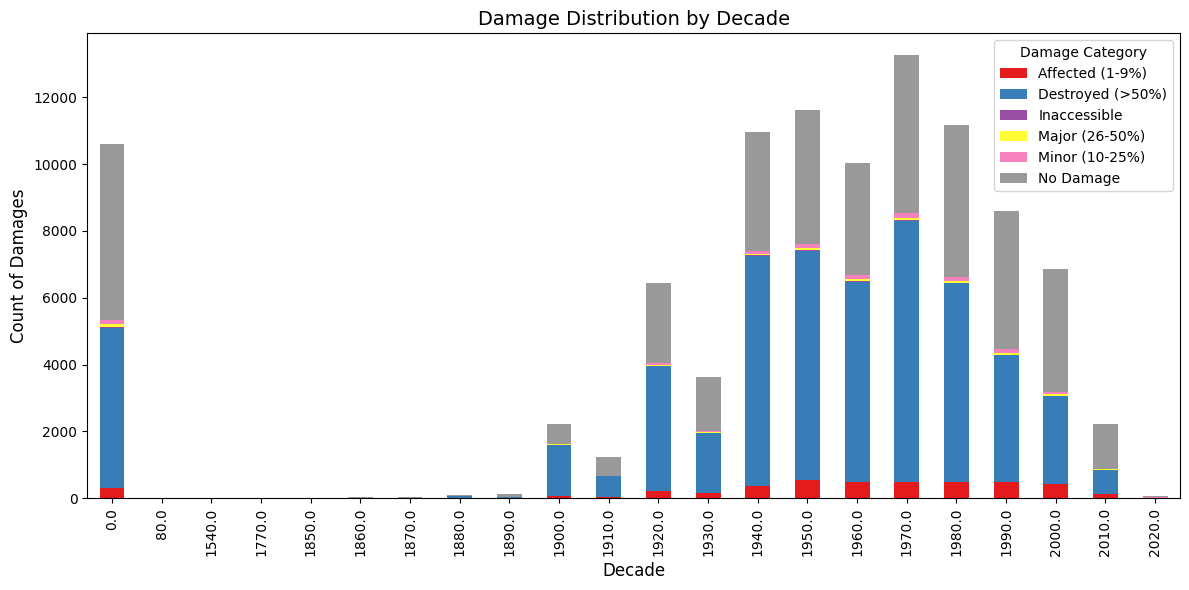

In [27]:
# Create a 'Decade' column by grouping the 'YEARBUILT' into decades
geo_data['Decade'] = (geo_data['YEARBUILT'] // 10) * 10

# Group data by Decade and DAMAGE, count occurrences
damage_by_decade = geo_data.groupby(['Decade', 'DAMAGE']).size().unstack().fillna(0)

# Plot stacked bar plot for damage distribution by Decade with 'Set1' color palette
damage_by_decade.plot(kind='bar', stacked=True, figsize=(12, 6), cmap='Set1')

# Customize plot
plt.title("Damage Distribution by Decade", fontsize=14)
plt.xlabel("Decade", fontsize=12)
plt.ylabel("Count of Damages", fontsize=12)
plt.legend(title="Damage Category", fontsize=10)
plt.tight_layout()
plt.show()

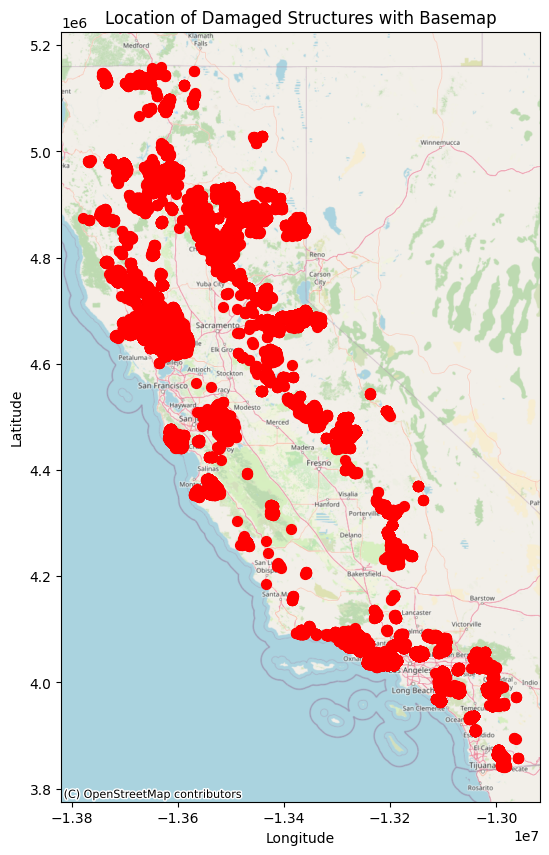

In [28]:
# Ensure the data has a valid projection (e.g., Web Mercator)
geo_data = geo_data.to_crs(epsg=3857)

# Plot the damage points on top of the basemap
fig, ax = plt.subplots(figsize=(10, 10))

# Plot your geospatial data
geo_data.plot(ax=ax, color='red', markersize=50)

# Add OpenStreetMap basemap
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

# Customize plot
plt.title("Location of Damaged Structures with Basemap")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

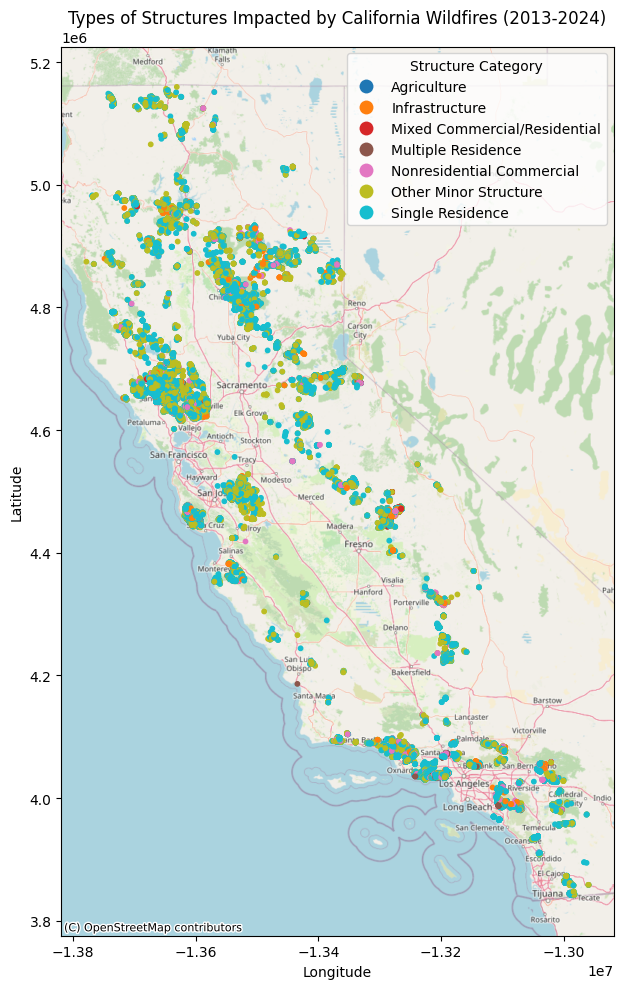

In [29]:
# Ensure the data has a valid projection (e.g., Web Mercator)
geo_data = geo_data.to_crs(epsg=3857)

# Plot the damage points on top of the basemap
fig, ax = plt.subplots(figsize=(10, 10))

# Plot your geospatial data
geo_data.plot(ax=ax, column='STRUCTURECATEGORY', markersize=10, legend=True,
              legend_kwds={'title': 'Structure Category'})

# Add OpenStreetMap basemap
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

# Customize plot
plt.title("Types of Structures Impacted by California Wildfires (2013-2024)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.tight_layout()

plt.savefig('wildfire_map_structuretype.png')

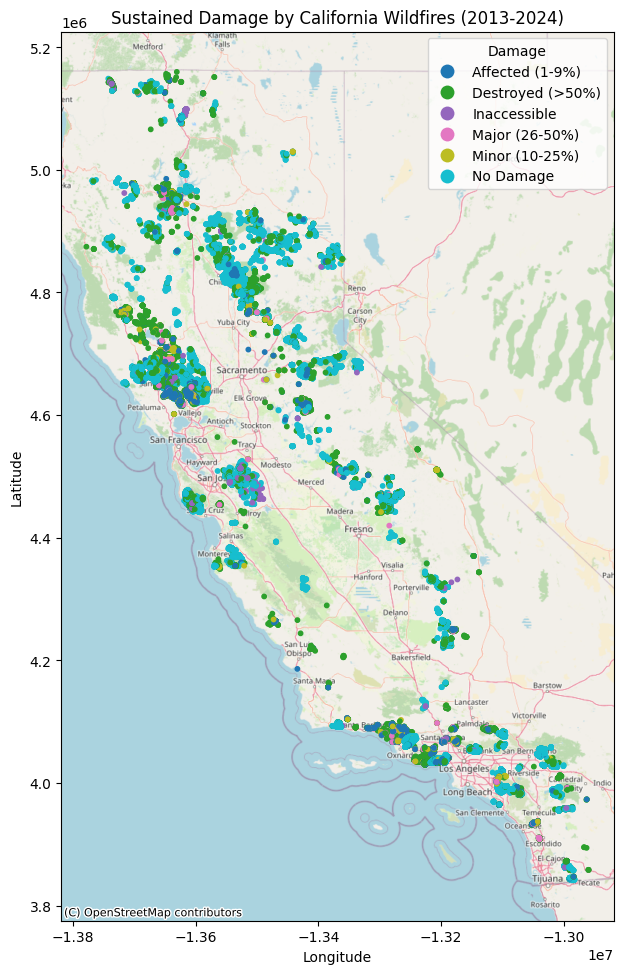

In [30]:
# Ensure the data has a valid projection (e.g., Web Mercator)
geo_data = geo_data.to_crs(epsg=3857)

# Plot the damage points on top of the basemap
fig, ax = plt.subplots(figsize=(10, 10))

# Plot your geospatial data
geo_data.plot(ax=ax, column='DAMAGE', markersize=10, legend=True,
              legend_kwds={'title': 'Damage'})

# Add OpenStreetMap basemap
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

# Customize plot
plt.title("Sustained Damage by California Wildfires (2013-2024)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.tight_layout()

plt.savefig('wildfire_map_damage.png')

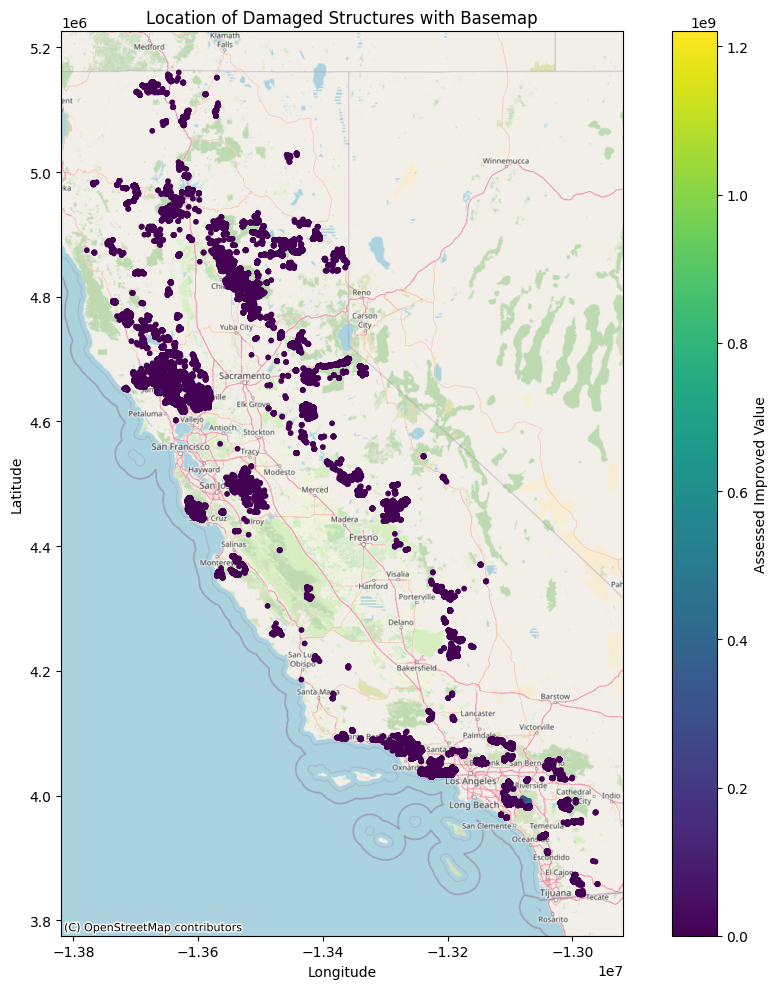

In [31]:
# Ensure the data has a valid projection (e.g., Web Mercator)
geo_data = geo_data.to_crs(epsg=3857)

# Plot the damage points on top of the basemap
fig, ax = plt.subplots(figsize=(10, 10))

# Plot your geospatial data
geo_data.plot(ax=ax, column='ASSESSEDIMPROVEDVALUE', markersize=10, legend=True,
              legend_kwds={'label': 'Assessed Improved Value'})

# Add OpenStreetMap basemap
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

# Customize plot
plt.title("Location of Damaged Structures with Basemap")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.tight_layout()
plt.show()

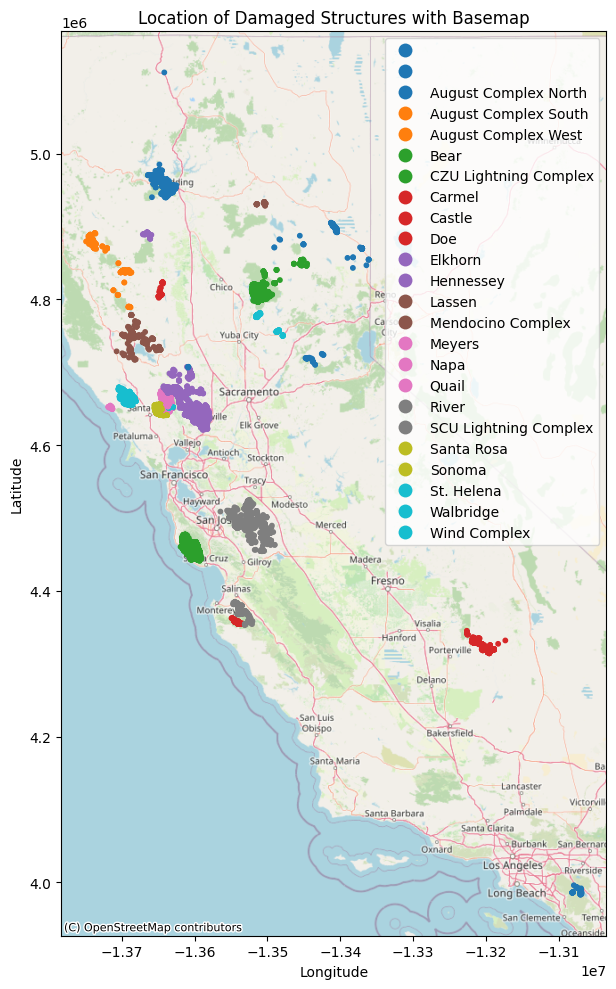

In [32]:
# Ensure the data has a valid projection (e.g., Web Mercator)
geo_data = geo_data.to_crs(epsg=3857)

# Plot the damage points on top of the basemap
fig, ax = plt.subplots(figsize=(10, 10))

# Plot your geospatial data
geo_data.plot(ax=ax, column='FIRENAME', markersize=10, legend=True)

# Add OpenStreetMap basemap
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

# Customize plot
plt.title("Location of Damaged Structures with Basemap")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.tight_layout()
plt.show()

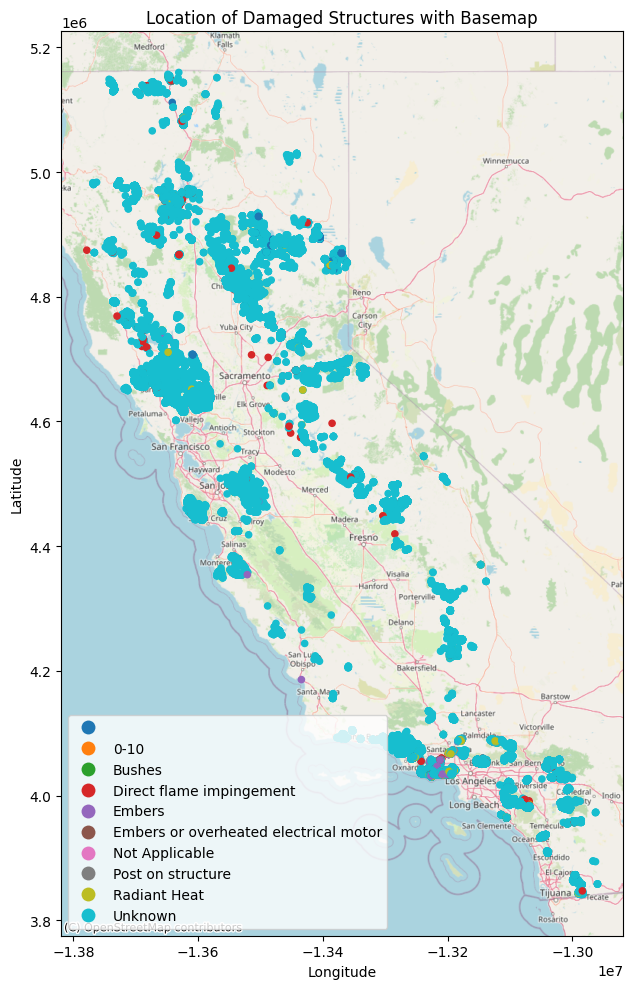

In [33]:
# Ensure the data has a valid projection (e.g., Web Mercator)
geo_data = geo_data.to_crs(epsg=3857)

# Plot the damage points on top of the basemap
fig, ax = plt.subplots(figsize=(10, 10))

geo_data['WHATDIDFIRESTARTFROM'] = geo_data['WHATDIDFIRESTARTFROM'].fillna('Unknown')
# Plot your geospatial data
geo_data.plot(ax=ax, column='WHATDIDFIRESTARTFROM', markersize=20, legend=True)

# Add OpenStreetMap basemap
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

# Customize plot
plt.title("Location of Damaged Structures with Basemap")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.tight_layout()
plt.show()

In [34]:
geo_data['WHATDIDFIRESTARTFROM'].fillna('Unknown')

0         Unknown
1         Unknown
2         Unknown
3         Unknown
4         Unknown
           ...   
130717    Unknown
130718    Unknown
130719    Unknown
130720    Unknown
130721    Unknown
Name: WHATDIDFIRESTARTFROM, Length: 130722, dtype: object

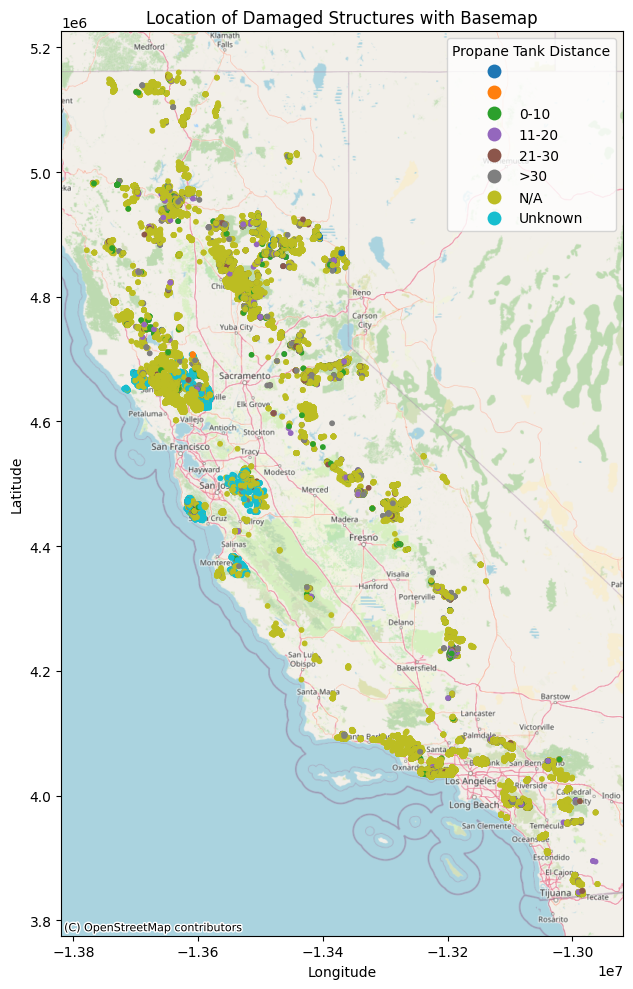

In [35]:
# Ensure the data has a valid projection (e.g., Web Mercator)
geo_data = geo_data.to_crs(epsg=3857)

# Plot the damage points on top of the basemap
fig, ax = plt.subplots(figsize=(10, 10))


geo_data['PROPANETANKDISTANCE'] = geo_data['PROPANETANKDISTANCE'].fillna('N/A')
# Plot your geospatial data
geo_data.plot(ax=ax, column='PROPANETANKDISTANCE', markersize=10, 
              legend=True, 
              legend_kwds={'title':'Propane Tank Distance'})

# Add OpenStreetMap basemap
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

# Customize plot
plt.title("Location of Damaged Structures with Basemap")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.tight_layout()
plt.show()